# GRIP : The Sparks Foundation Data Science And Business Analytics Internship

# Creator : Aaryan Kaushal

# Task 6 : To Create a Decision Tree Classifier And Visualize it Graphically

## Importing the required libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline



The following settings will improve the default style and font sizes for our charts.

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Reading our dataset 

In [4]:
df = pd.read_csv('Iris.csv')

In [9]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Let's check the column types of the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [80]:
# Checking for null values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Hence we can see that there is no missing values.

### Prepare the data for training

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)

In [15]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (96, 6)
val_df.shape : (24, 6)
test_df.shape : (30, 6)


 ### Input and Target Columns

In [23]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'Species'

In [24]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [25]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [26]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

From the dataset it is clear that the input columns data lie within a similar range so there is no need for scaling the input data

## Training the Data

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
model = DecisionTreeClassifier(random_state=42,max_depth=4)

In [70]:
%%time
model.fit(train_inputs, train_targets)

Wall time: 3.99 ms


DecisionTreeClassifier(max_depth=4, random_state=42)

Let's evaluate the decision tree using the accuracy score.

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
train_preds = model.predict(train_inputs)

In [73]:
pd.value_counts(train_preds)

Iris-virginica     33
Iris-setosa        32
Iris-versicolor    31
dtype: int64

Each Species occurs almost equal number of times.

### Calculating probabilities of occurence of each species

In [74]:
train_probs = model.predict_proba(train_inputs)

In [75]:
train_probs

array([[0.  , 0.75, 0.25],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
 

It seems that our model is quite confident of its predictions with most of the times the probability being 1.

In [76]:
accuracy_score(train_targets, train_preds)

0.9895833333333334

In [83]:
model.score(val_inputs, val_targets)

0.9166666666666666

In [78]:
model.score(test_inputs, test_targets)

0.9333333333333333

Hence we can see that our decision tree model gives an accuracy of around 92% and 93% respectively on the validation and the test set respectively which makes it a fairly descent model for prediction.

We can visualize the decision tree learned from the training data.

In [41]:
from sklearn.tree import plot_tree, export_text

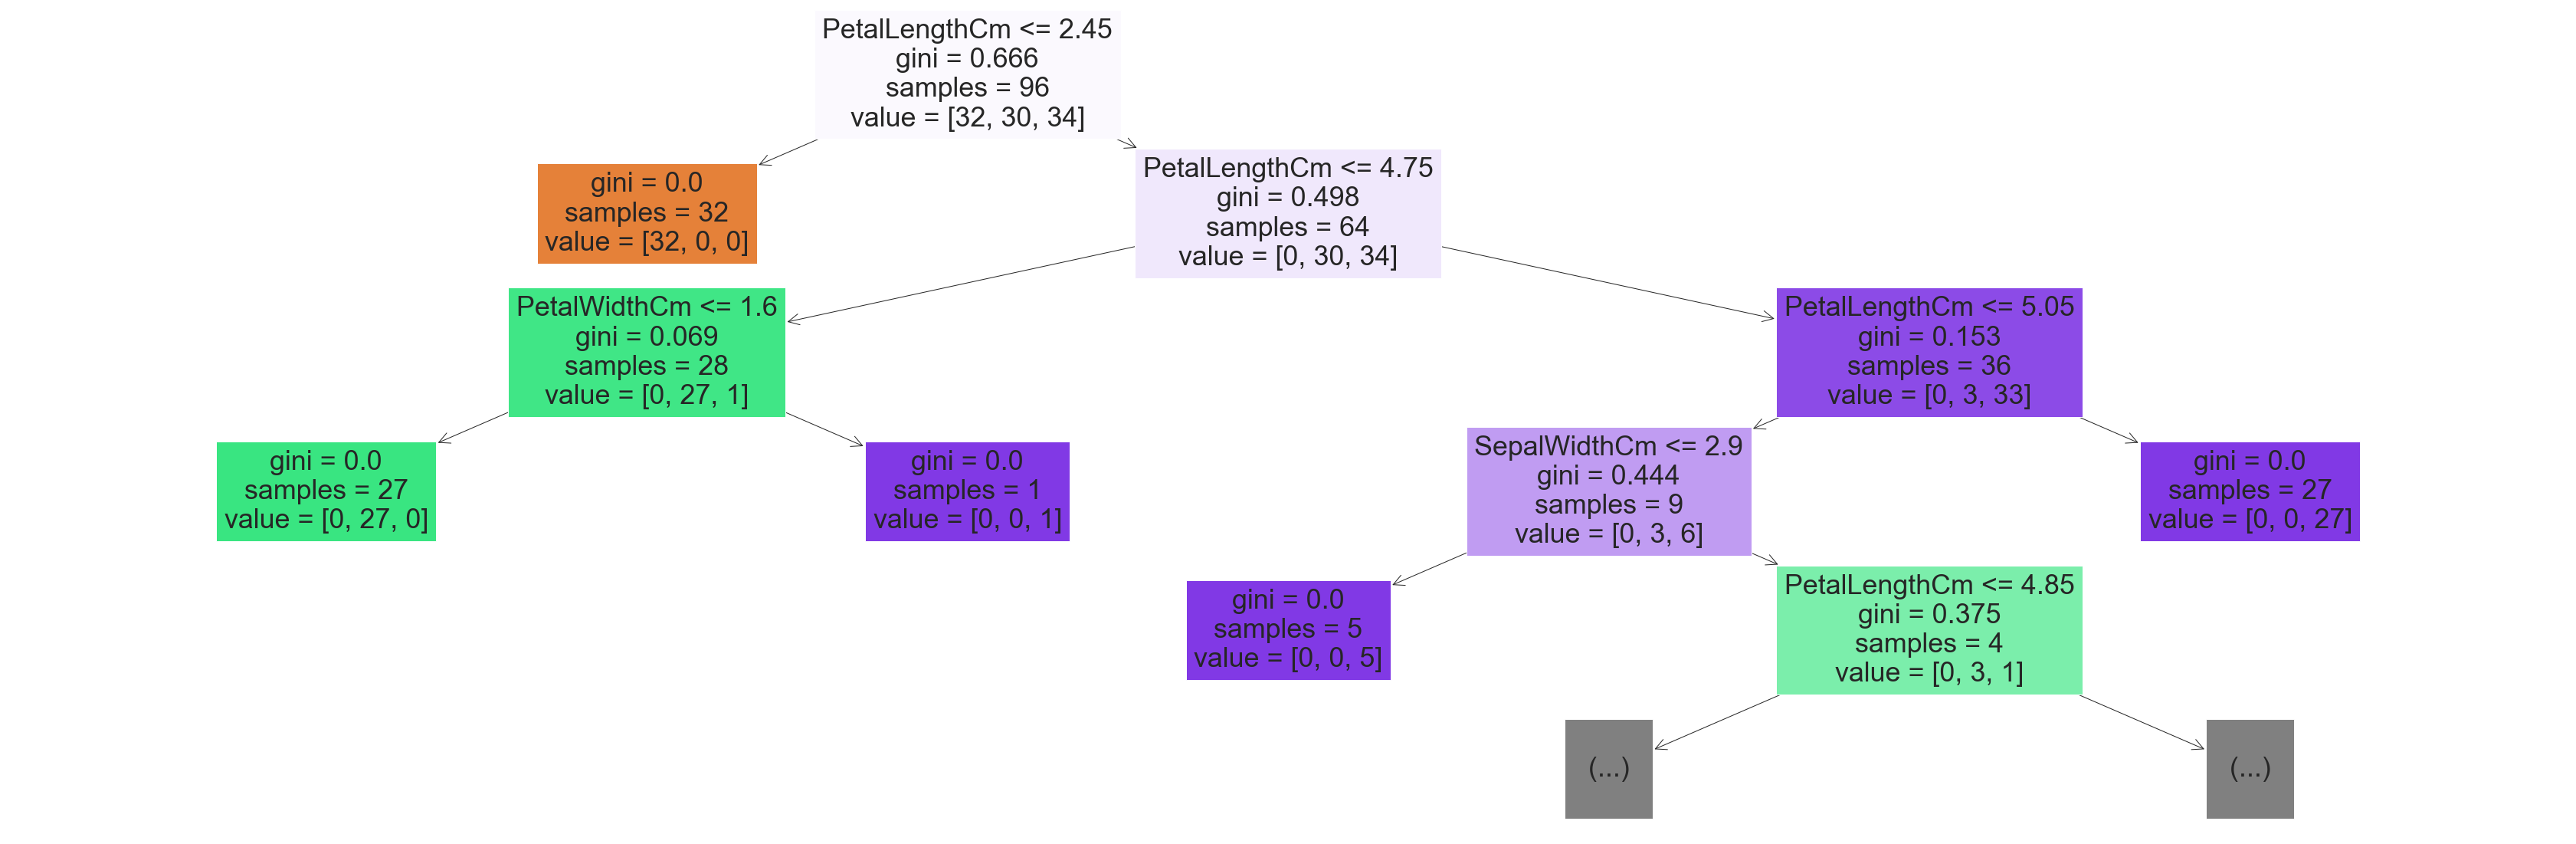

In [45]:
plt.figure(figsize=(60,20))
plot_tree(model, feature_names=train_inputs.columns, max_depth=4, filled=True);

In [46]:
model.tree_.max_depth

6

We can also display the tree as text, which can be easier to follow for deeper trees.

In [84]:
tree_text = export_text(model, max_depth=4, feature_names=list(train_inputs.columns))
print(tree_text[:])

|--- PetalLengthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.45
|   |--- PetalLengthCm <= 4.75
|   |   |--- PetalWidthCm <= 1.60
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalWidthCm >  1.60
|   |   |   |--- class: Iris-virginica
|   |--- PetalLengthCm >  4.75
|   |   |--- PetalLengthCm <= 5.05
|   |   |   |--- SepalWidthCm <= 2.90
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- SepalWidthCm >  2.90
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  5.05
|   |   |   |--- class: Iris-virginica



Hence we can observe that if PetalLength is less than 2.45 it belongs to Irissetosa otherwise it checks for PetalLength less than 4.75 and if it is so and PetalWidth is less than 1.60 it belongs to Irisversicolor otherwise it belongs to Irisverginica.
Then if Petallength is greater than 4.75 it checks for Petal Length less than 5.05 and then if Sepal Width is less than 2.90 it belongs to IrisVerginica otherwise it belongs to Irisversicolor. And if Petal Length was greater than 5.05 it belongs to Irisverginica.

In [50]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [51]:
importance_df

,feature,importance
2,PetalLengthCm,0.915068
1,SepalWidthCm,0.054759
3,PetalWidthCm,0.030173
0,SepalLengthCm,0.000000


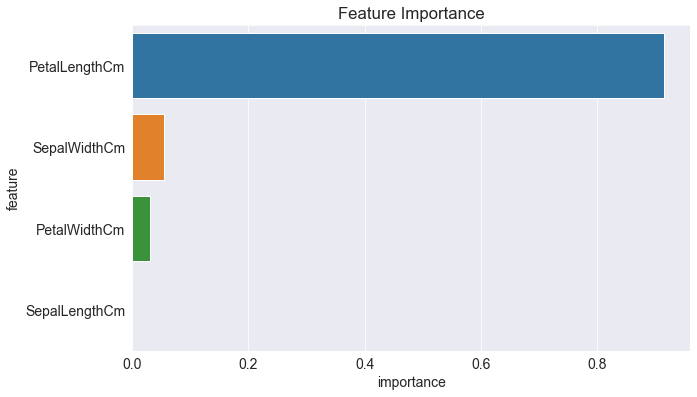

In [52]:
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

Hence the most important feature in predicting the species is the Petal length with 91% weight followed by Sepal Width and PetalWidth having little significance. Also the Sepal length column is of no use to us as it has negligible amount of importance.